**Introduction**

When applying for a bank loan, there is a lengthy process involving the submission of various documents
and details such as a good credit score, a no dues certificate, and sometimes even a no crime certificate.
However, not everyone is eligible for these loans and able to meet all the documentation requirements
and profile evaluations.

**About Company**

Loan Tap, as a company, aims to provide loans to individuals and small-sized firms (MSMEs) who may not be able to fulfill all the necessary requirements. They specifically target high-risk profiles as their potential customers, but within this category, there are three sub-profiles that loan applicants can fall into.

The first category is the "White Collar" customers, who are considered high risk but are expected to
repay their loans. The second category is the "Grey Collar" customers, who have a mixed likelihood of
repaying the loan. Lastly, the "Black Collar" customers are those who are unlikely to be able to repay the
loan.

**Business Case Study**

Loan Tap focuses on the White Collar and Grey Collar customers only. However, they cannot approve loans for all Grey Collar customers. This is where data scientists come in. They are needed to properly
profile the Grey Collar customers so that Loan Tap can have a balanced mix of high-risk and low-risk
customers, allowing them to potentially make a profit even if a few customers default on their loans.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

**Problem Statement**

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

**Features**

1. loan_amnt: Amount borrower applied for.
2. term: Loan duration (36 or 60 months).
3. int_rate: Interest rate on loan.
4. installment: Monthly repayment amount.
5. grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)
6. sub_grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)
7. emp_title: Borrower's job title.
8. emp_length: Duration of borrower's employment (0-10 years).
9. home_ownership: Borrower's housing situation (own, rent, etc.).
10. annual_inc: Borrower's yearly income.
11. verification_status: Whether borrower's income was verified.
12. issue_d: Loan issuance month.
13. loan_status: Current status of the loan.
14. purpose: Borrower's reason for the loan.
15. title: The loan's title provided by the borrower.
16. dti (Debt-to-Income ratio): Monthly debt vs. monthly income ratio.
17. earliest_cr_line: Date of borrower's oldest credit account.
18. open_acc: Number of borrower's active credit lines.
19. pub_rec: Negative records on borrower's public credit profile.
20. revol_bal: Total credit balance.
21. revol_util: Usage percentage of 'revolving' accounts like credit cards.
22. total_acc: Total number of borrower's credit lines.
23. initial_list_status: Loan's first category ('W' or 'F').
24. application_type: Individual or joint application.
25. mort_acc: Number of borrower's mortgages.
26. pub_rec_bankruptcies: Bankruptcy records for borrower.
27. Address: Borrower's location.

In [346]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Configuration

In [347]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 100

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# Data Inspection

In [348]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/datasets/loantap.csv')
df.columns = [s.strip().lower() for s in df.columns]

df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


# Class Imbalance

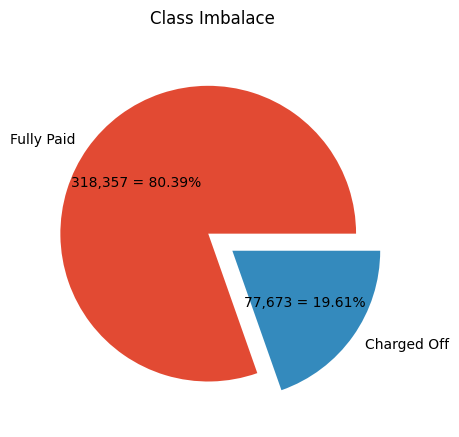

In [349]:
import seaborn as sns

counts = df['loan_status'].value_counts()

plt.pie(
    x=counts.values, labels=counts.index,
    autopct=lambda x: '{:,.0f} = {:.2f}%'.format(
        x * counts.sum()/100, x),
    explode=[0.1] * 2
)

plt.suptitle('Class Imbalace')
plt.show()

# Loan Amnt & Annual Income Ratio

In [350]:
df = df[df.annual_inc > 0]
df.loc[:, 'loan_income_ratio'] = df['loan_amnt'] / df['annual_inc']

# Zip Code from Address

In [351]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:]).astype('int')
df.drop(columns=['address'], inplace=True, errors='ignore')

# Missing Values

## Inspection

In [352]:
def highlight_missing_values(df):
  missing_values_df = df.isnull().sum().to_frame(name='missing_values').reset_index().rename(columns={'index': 'features'})
  total_rows = df.shape[0]
  missing_values_df['missing_percentage'] = (missing_values_df['missing_values'] / total_rows) * 100
  missing_values_df['missing_percentage'] = missing_values_df['missing_percentage'].round(2)

  def highlight_missing(val):
    return 'background-color: orange; color: black; border: 1px solid black' if val > 0 else ''

  styled_missing_value_df = missing_values_df.style.map(highlight_missing, subset=['missing_values'])
  styled_missing_value_df = styled_missing_value_df.map(highlight_missing, subset=['missing_percentage'])

  return styled_missing_value_df

styled_df = highlight_missing_values(df)
styled_df

,features,missing_values,missing_percentage
0,loan_amnt,0,0.000000
1,term,0,0.000000
2,int_rate,0,0.000000
3,installment,0,0.000000
4,grade,0,0.000000
5,sub_grade,0,0.000000
6,emp_title,22926,5.790000
7,emp_length,18300,4.620000
8,home_ownership,0,0.000000
9,annual_inc,0,0.000000


## Imputation

In [353]:
df['mort_acc'] = df['mort_acc'].fillna(df.groupby(['home_ownership', 'total_acc'])['mort_acc'].transform('median'))
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].median())

## Drop Rows

In [354]:
df.dropna(subset=['emp_title', 'title', 'emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

# Statistical Analysis

## Descriptive

In [355]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,370621.0,NaN,NaN,NaN,14250.184488,8357.785097,500.0,8000.0,12000.0,20000.0,40000.0
term,370621,2,36 months,280484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,370621.0,NaN,NaN,NaN,13.637437,4.471626,5.32,10.49,13.33,16.49,30.99
installment,370621.0,NaN,NaN,NaN,435.218184,250.35895,16.08,254.17,379.19,571.56,1533.81
grade,370621,7,B,108666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,370621,35,B3,24960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,370621,172143,Teacher,4367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,370621,11,10+ years,123389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,370621,6,MORTGAGE,186218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,370621.0,NaN,NaN,NaN,75187.871984,62090.256707,4000.0,46000.0,65000.0,90000.0,8706582.0


## Skewness and Kurtosis

In [356]:
from scipy.stats import skew, kurtosis

continous_cols = df.select_dtypes(include='float64').columns

skew_kurtosis_df = pd.DataFrame({
    'feature': continous_cols,
    'skewness': [skew(df[col], bias=False) for col in continous_cols],
    'kurtosis': [kurtosis(df[col], bias=False, fisher=True) for col in continous_cols]
})

high_skew_threshold = 1
high_kurtosis_threshold = 3

def highlight_skew_kurtosis(val, skew_col, kurt_col):
  if skew_col and (val > high_skew_threshold or val < -high_skew_threshold):
    return 'background-color: yellow; color: black; border: 1px solid black'
  elif kurt_col and (val > high_kurtosis_threshold):
    return 'background-color: orange; color: black; border: 1px solid black'
  return ''

styled_skew_kurtosis_df = skew_kurtosis_df.style.map(
    lambda val: highlight_skew_kurtosis(val, True, False), subset=['skewness']
).map(
    lambda val: highlight_skew_kurtosis(val, False, True), subset=['kurtosis']
)

styled_skew_kurtosis_df

,feature,skewness,kurtosis
0,loan_amnt,0.763974,-0.086194
1,int_rate,0.421028,-0.144519
2,installment,0.972973,0.761108
3,annual_inc,42.466520,4385.375258
4,dti,0.515125,10.738939
5,open_acc,1.213080,2.981313
6,pub_rec,17.923529,2100.411980
7,revol_bal,11.703975,388.760765
8,revol_util,-0.069400,2.988814
9,total_acc,0.861486,1.206795


# Binning

In [357]:
import numpy as np

df.loc[:, 'open_acc_binned'] = pd.cut(df['open_acc'], bins=[0, 5, 10, 20, 50, np.inf], labels=['0-5', '6-10', '11-20', '21-50', '50+'])
df.loc[:, 'pub_rec_binned'] = pd.cut(df['pub_rec'], bins=[-1, 0, 1, 2, 5, np.inf], labels=['0', '1', '2', '3-5', '>5'])
df.loc[:, 'pub_rec_bankruptcies_binned'] = pd.cut(df['pub_rec_bankruptcies'], bins=[0, 1, 2, df['pub_rec_bankruptcies'].max()], labels=['0', '1', '2+'])
df.loc[:, 'mort_acc_binned'] = pd.cut(df['mort_acc'], bins=[0, 1, 3, 6, df['mort_acc'].max()], labels=['0', '1-2', '3-5', '6+'])

df.drop(columns=['open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'mort_acc'], inplace=True)

# Home Ownership 'Other' Category

In [358]:
df.loc[:, 'home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if x in ['ANY', 'NONE'] else x)

# Month and Year from DateTime Features

In [359]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')

# Issue Date
df['issue_d_year'] = df['issue_d'].dt.year.astype('datetime64[ns]')
df['issue_d_month'] = df['issue_d'].dt.month

# Earliest Credit Line
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year.astype('datetime64[ns]')
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month

df.drop(columns=['issue_d', 'earliest_cr_line'], inplace=True, errors='ignore')

# Categorical Types

In [360]:
categorical_cols = ['term', 'emp_title', 'earliest_cr_line_month', 'issue_d_month', 'zip_code', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'initial_list_status', 'application_type', 'mort_acc_binned', 'pub_rec_binned', 'pub_rec_bankruptcies_binned', 'open_acc_binned' ]
df[categorical_cols] = df[categorical_cols].astype('category')

# Data Information

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370621 entries, 0 to 396029
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    370621 non-null  float64       
 1   term                         370621 non-null  category      
 2   int_rate                     370621 non-null  float64       
 3   installment                  370621 non-null  float64       
 4   grade                        370621 non-null  category      
 5   sub_grade                    370621 non-null  category      
 6   emp_title                    370621 non-null  category      
 7   emp_length                   370621 non-null  category      
 8   home_ownership               370621 non-null  category      
 9   annual_inc                   370621 non-null  float64       
 10  verification_status          370621 non-null  category      
 11  loan_status                  37

# Log Transformation

In [362]:
# from scipy.stats import boxcox
# from sklearn.preprocessing import PowerTransformer

# continuous_cols = categorical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# for col in continuous_cols:
#     if (df[col] > 0).all():
#         df[col], _ = boxcox(df[col])
#     else:
#         print(f"{col} has non-positive values, consider using Yeo-Johnson instead.")

# pt = PowerTransformer(method='yeo-johnson')
# df[continuous_cols] = pt.fit_transform(df[continuous_cols])

# Clipping

In [363]:
def iqr_clipping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[column].clip(lower=lower_bound, upper=upper_bound)

continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in continuous_cols:
  df.loc[:, col] = iqr_clipping(df, col)

# Continous Data Distribution

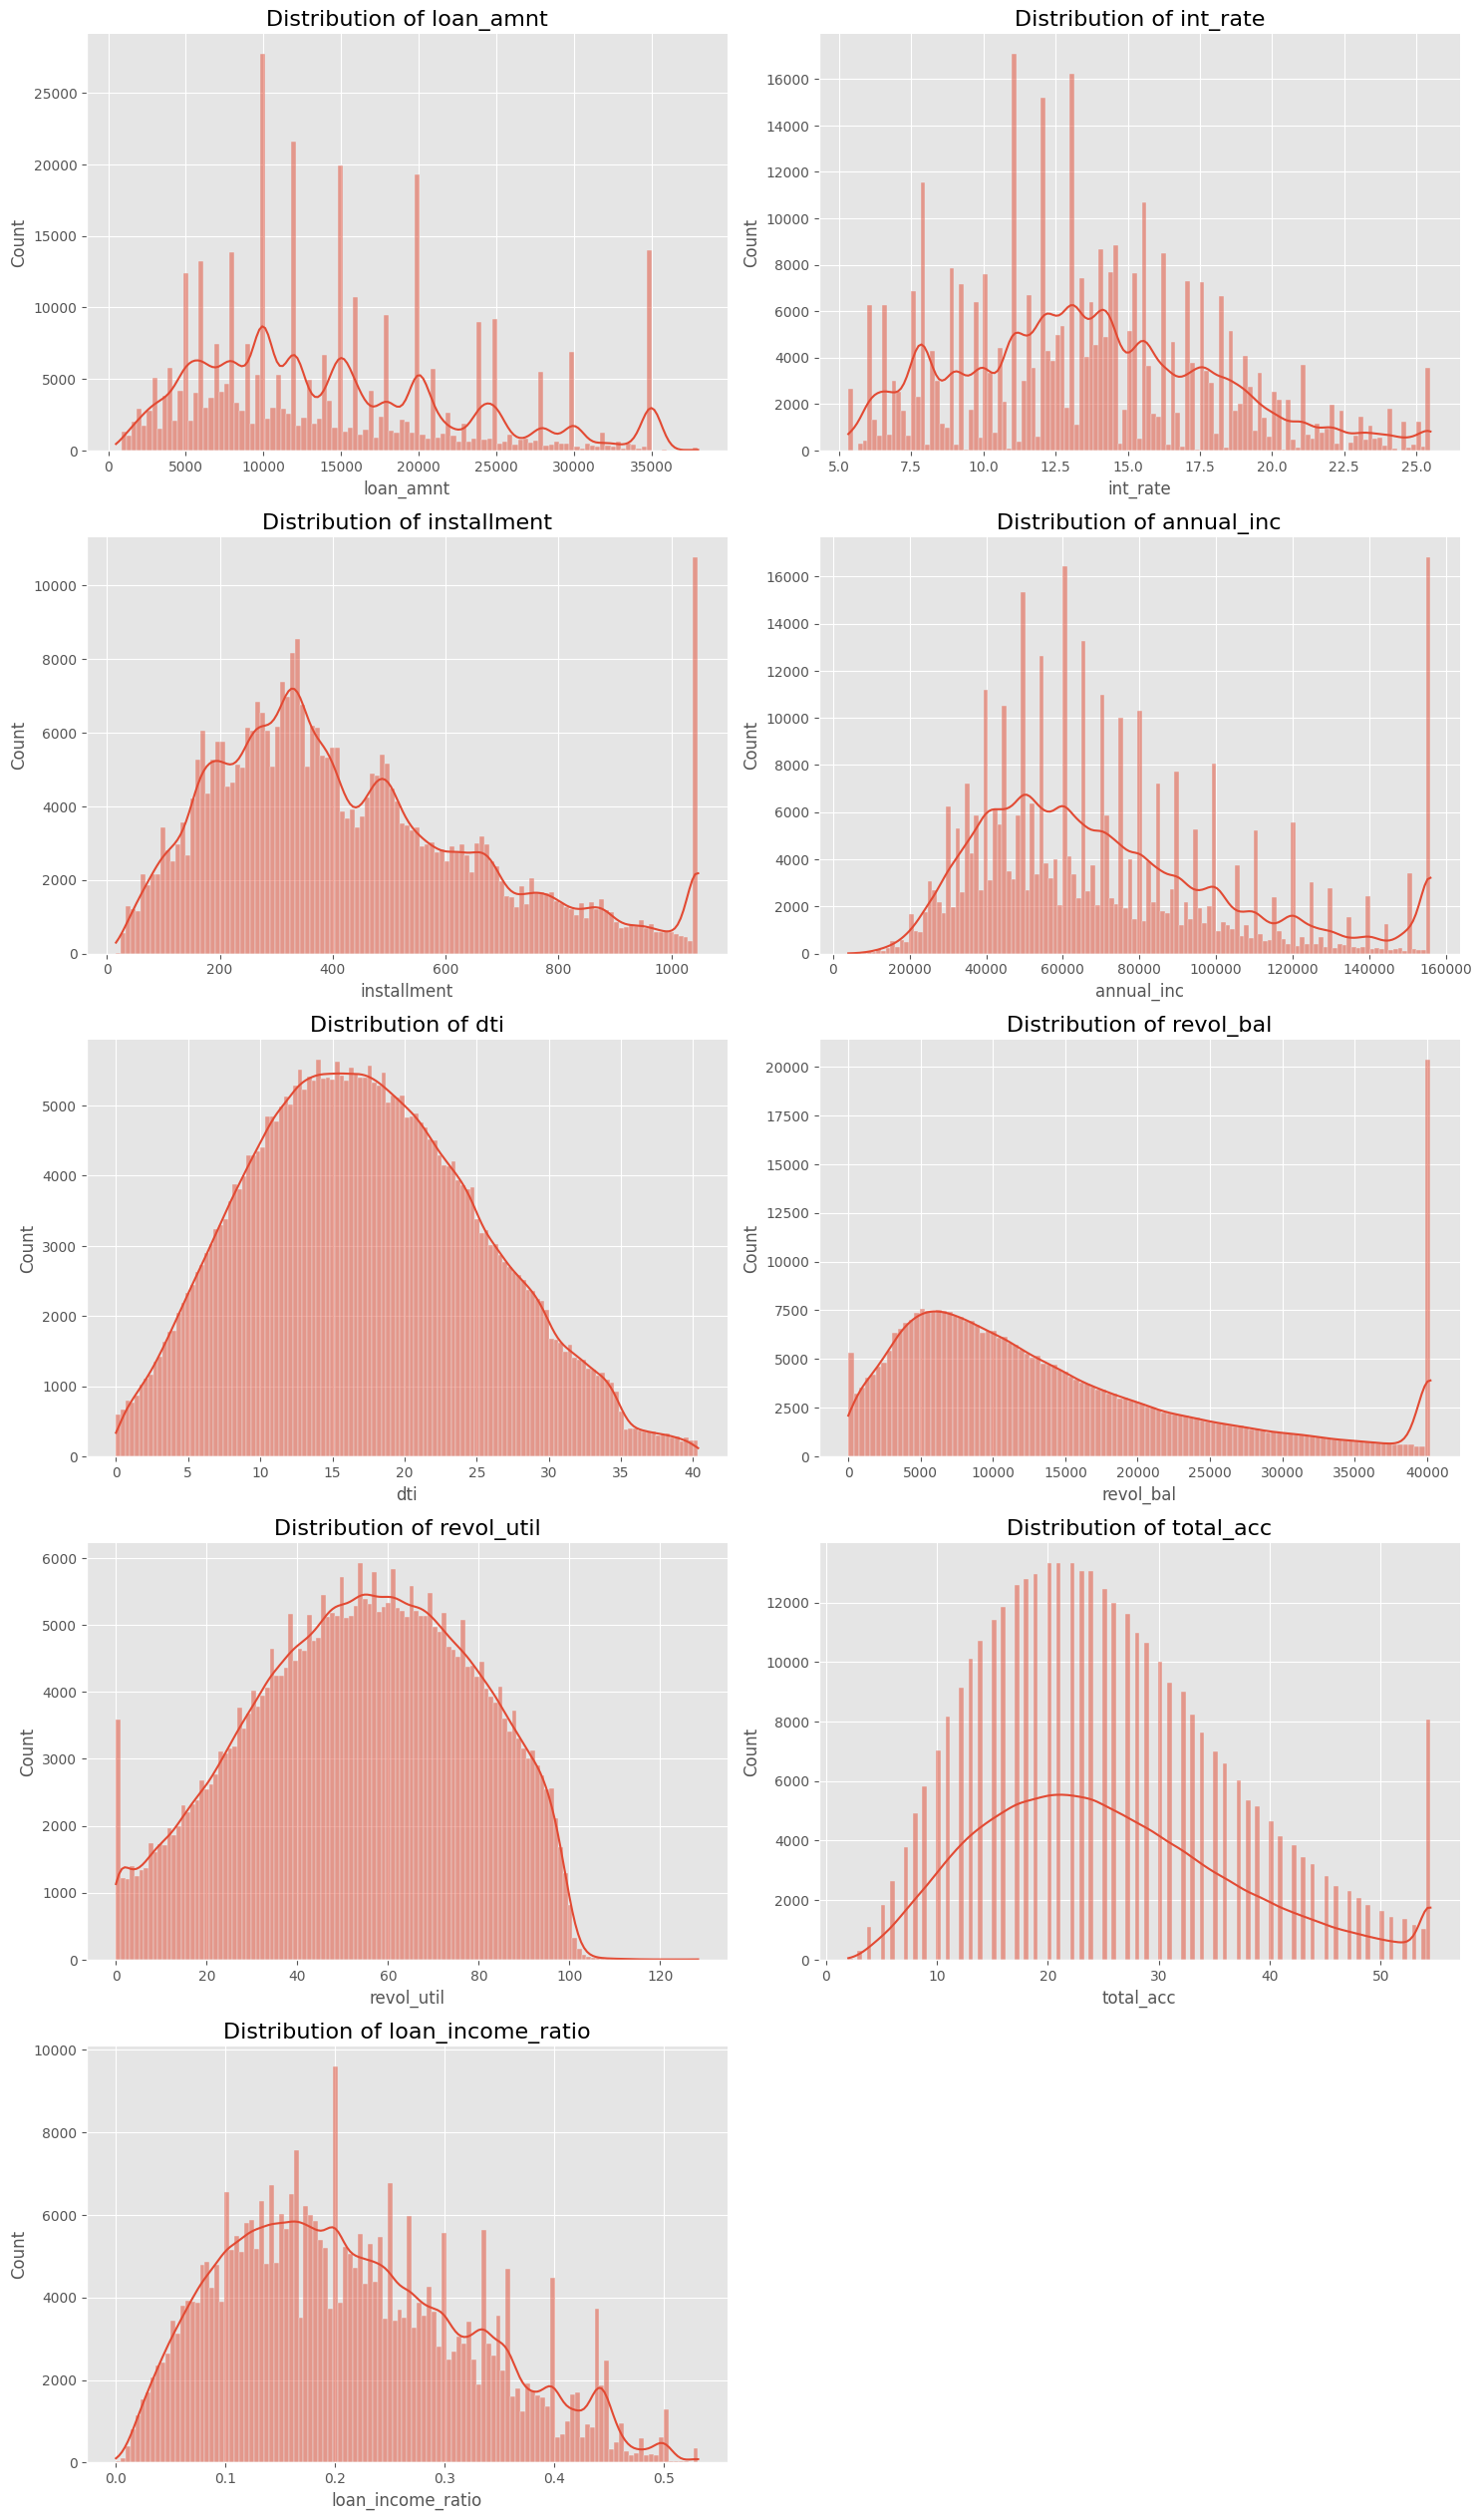

In [364]:
import math

num_cols = 2
num_plots = len(continous_cols)
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
  sns.histplot(data=df, x=col, kde=True, ax=axes[i])
  axes[i].set_ylabel('Count', fontsize=12)
  axes[i].set_xlabel(col, fontsize=12)
  axes[i].set_title(f'Distribution of {col}', fontsize=16)
  sns.despine(ax=axes[i])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Categorical Data Distribution

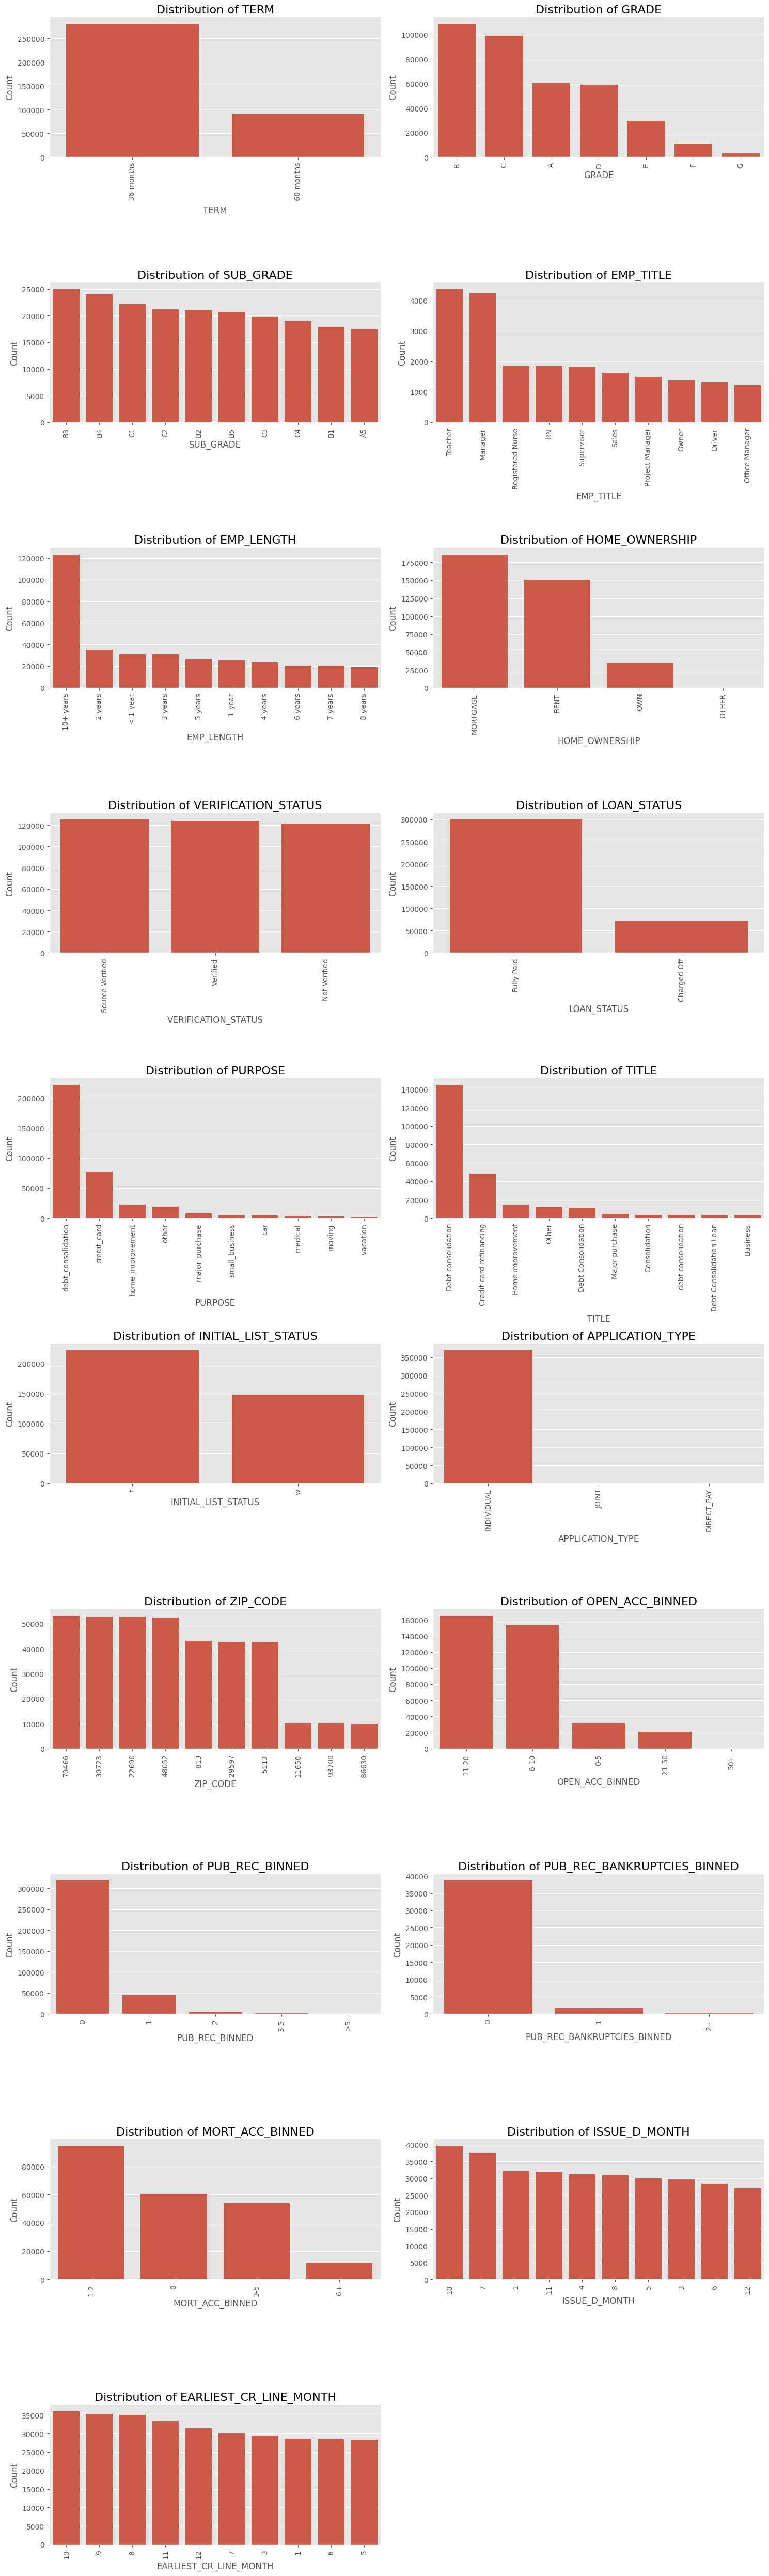

In [365]:
categorical_cols = df.select_dtypes(include='category').columns

num_cols = 2
num_plots = len(categorical_cols)
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
  top_n = 10
  top_categories = df[col].value_counts().head(top_n)

  sns.countplot(data=df, x=col, order=top_categories.index, ax=axes[i])
  axes[i].set_ylabel('Count', fontsize=12)
  axes[i].set_xlabel(col.upper(), fontsize=12)
  axes[i].set_title(f'Distribution of {col.upper()}', fontsize=16)
  axes[i].tick_params(axis='x', rotation=90)
  sns.despine(ax=axes[i])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Continous Features per Loan Status

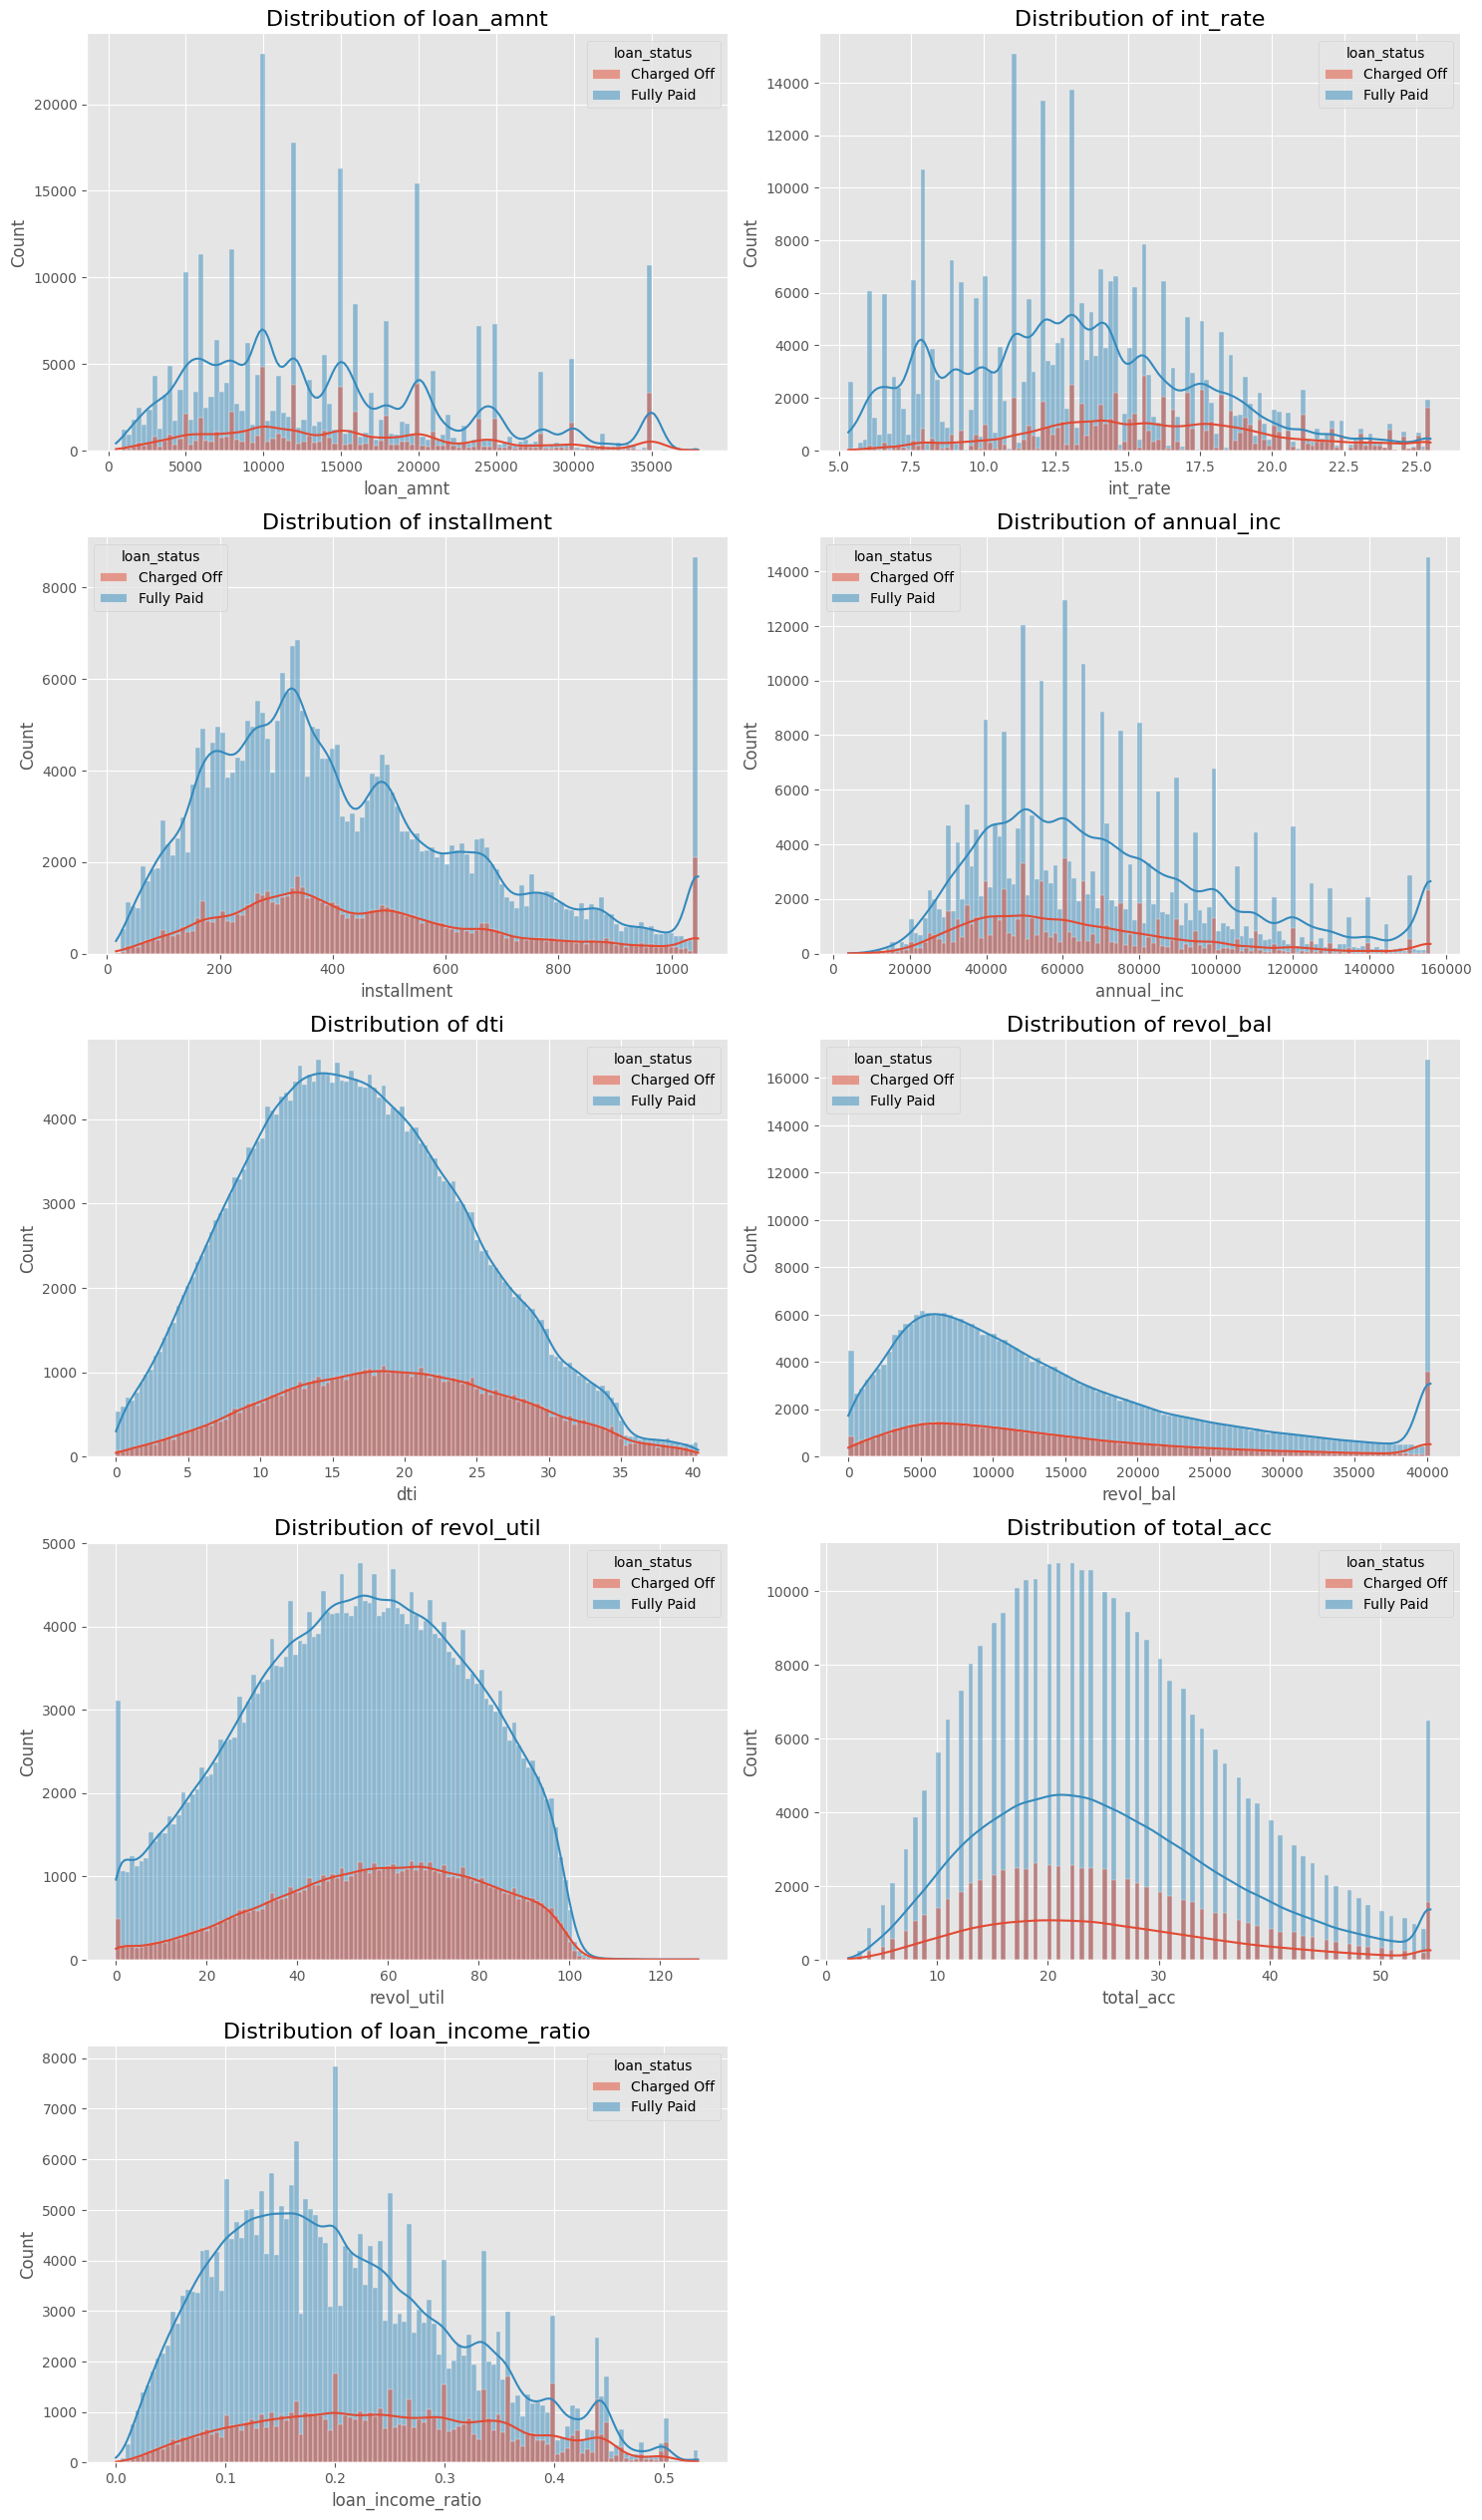

In [366]:
import seaborn as sns
import math

num_cols = 2
num_plots = len(continous_cols)
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
  sns.histplot(data=df, x=col, kde=True, hue='loan_status', ax=axes[i])
  axes[i].set_ylabel('Count', fontsize=12)
  axes[i].set_xlabel(col, fontsize=12)
  axes[i].set_title(f'Distribution of {col}', fontsize=16)
  sns.despine(ax=axes[i])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Categorical Features per Loan Status

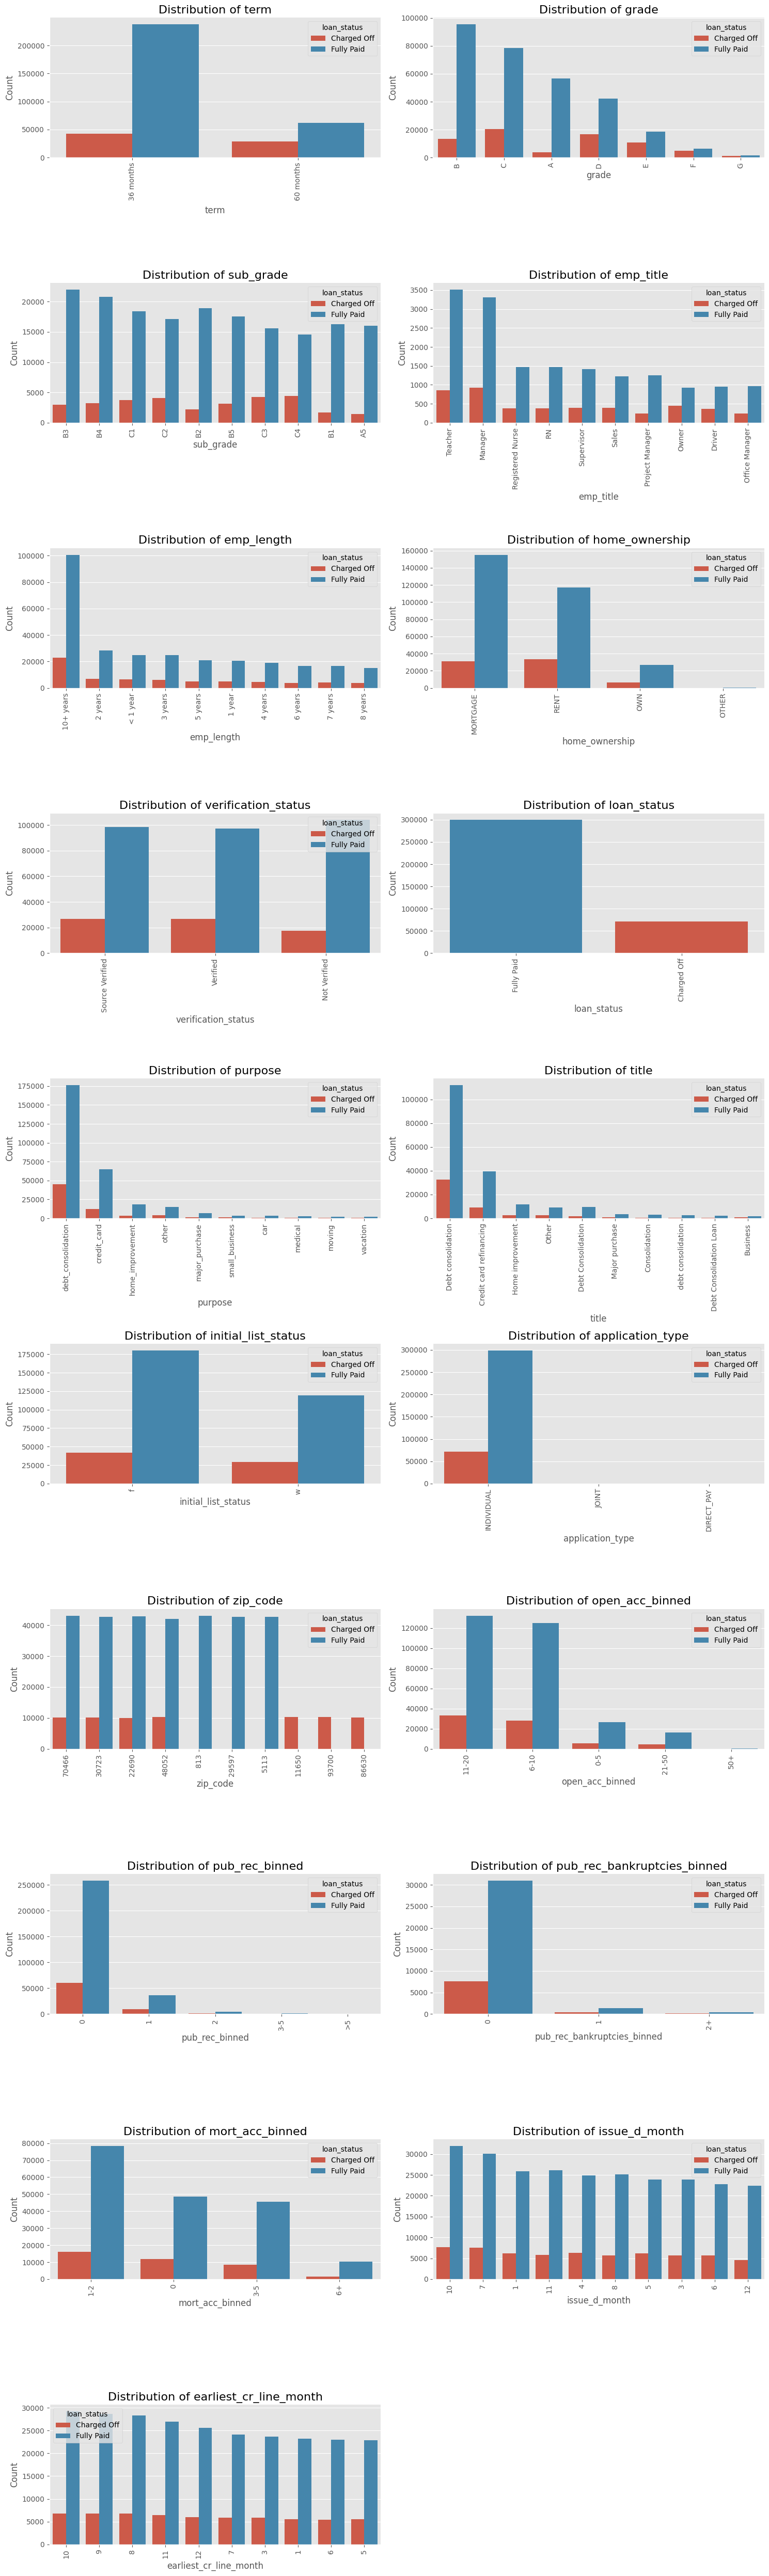

In [367]:
num_cols = 2
num_plots = len(categorical_cols)
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
  top_n = 10
  top_categories = df[col].value_counts().head(top_n)

  sns.countplot(data=df, x=col, order=top_categories.index, hue='loan_status', ax=axes[i])
  axes[i].set_ylabel('Count', fontsize=12)
  axes[i].set_xlabel(col, fontsize=12)
  axes[i].set_title(f'Distribution of {col}', fontsize=16)
  axes[i].tick_params(axis='x', rotation=90)
  sns.despine(ax=axes[i])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Binary Encoding

In [368]:
for col in df.columns:
  if df[col].nunique() == 2:
    unique_vals = df[col].unique()
    df[col] = df[col].map({unique_vals[0]: 0, unique_vals[1]: 1})

In [369]:
# # Mortgage Accounts
# df['mort_acc'] = df['mort_acc'].apply(lambda x: 0 if x == 0.0 or x == 0 else 1)

# # Public Records Bankruptcies
# df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x: 0 if x == 0.0 or x == 0 else 1)

# Average Loan to Income Ratio over Time

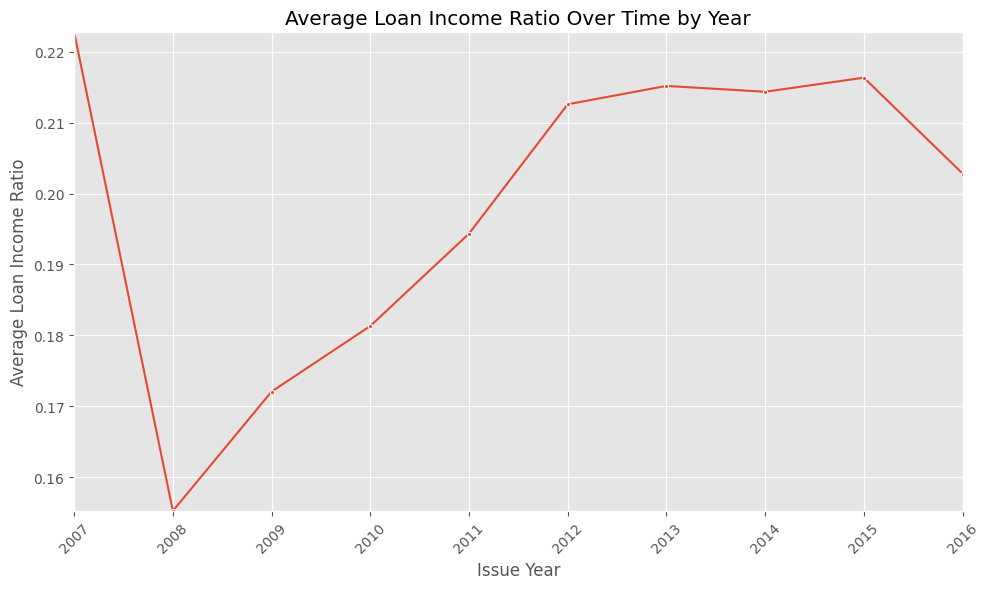

In [370]:
df['issue_d_year'] = df['issue_d_year'].astype('int64')

yearly_loan_income_ratio = df.groupby(['issue_d_year'])['loan_income_ratio'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_loan_income_ratio, x='issue_d_year', y='loan_income_ratio', marker='o', linestyle='-', markersize=3)
plt.title('Average Loan Income Ratio Over Time by Year')
plt.xlabel('Issue Year')
plt.ylabel('Average Loan Income Ratio')
plt.xticks(rotation=45)
plt.grid(True)

plt.xlim(yearly_loan_income_ratio['issue_d_year'].min(), yearly_loan_income_ratio['issue_d_year'].max())
plt.ylim(yearly_loan_income_ratio['loan_income_ratio'].min(), yearly_loan_income_ratio['loan_income_ratio'].max())

plt.tight_layout()
plt.show()

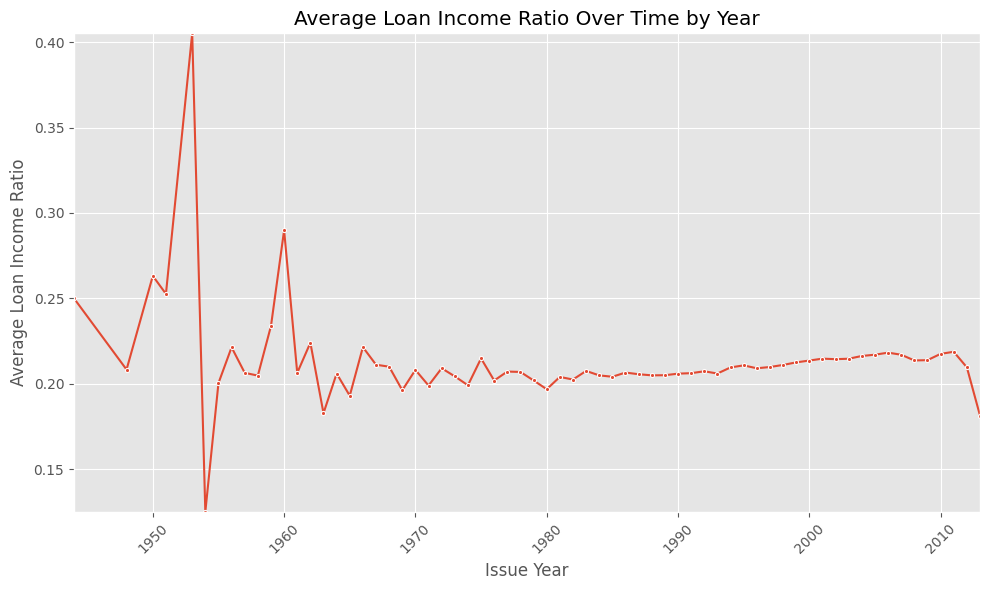

In [371]:
df['earliest_cr_line_year'] = df['earliest_cr_line_year'].astype('int64')

yearly_loan_income_ratio = df.groupby(['earliest_cr_line_year'])['loan_income_ratio'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_loan_income_ratio, x='earliest_cr_line_year', y='loan_income_ratio', marker='o', linestyle='-', markersize=3)
plt.title('Average Loan Income Ratio Over Time by Year')
plt.xlabel('Issue Year')
plt.ylabel('Average Loan Income Ratio')
plt.xticks(rotation=45)
plt.grid(True)

plt.xlim(yearly_loan_income_ratio['earliest_cr_line_year'].min(), yearly_loan_income_ratio['earliest_cr_line_year'].max())
plt.ylim(yearly_loan_income_ratio['loan_income_ratio'].min(), yearly_loan_income_ratio['loan_income_ratio'].max())

plt.tight_layout()
plt.show()

# Drop Columns

In [372]:
df.drop(columns=['emp_title', 'title'], inplace=True, errors='ignore')

# Train Test Split

In [373]:
from sklearn.model_selection import train_test_split

x = df.drop(columns='loan_status', errors='ignore')
y = df['loan_status']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((296496, 27), (74125, 27), (296496,), (74125,))

# Label Encoding

In [374]:
from sklearn.preprocessing import LabelEncoder

label_cols = [col for col in df.select_dtypes(include='category') if df[col].nunique() > 2 and df[col].nunique() <= 500]
encoder = LabelEncoder()

for col in label_cols:
  xtrain[col] = encoder.fit_transform(xtrain[col])
  xtest[col] = encoder.transform(xtest[col])

xtrain

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,revol_bal,revol_util,total_acc,initial_list_status,application_type,loan_income_ratio,zip_code,open_acc_binned,pub_rec_binned,pub_rec_bankruptcies_binned,mort_acc_binned,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
268284,9100.0,0,11.14,298.530,1,6,2,3,45000.0,0,1,12.21,5838.0,36.7,31.0,0,1,0.202222,0,1,0,3,4,2013,0,1996,3
147394,35000.0,0,10.99,1047.645,1,6,9,0,156000.0,2,1,9.57,36566.0,37.5,40.0,1,1,0.175000,3,1,0,3,3,2014,0,1985,11
249789,10000.0,0,10.16,323.430,1,5,2,3,40000.0,0,1,6.78,11227.0,50.7,12.0,1,1,0.250000,7,0,0,3,4,2013,5,1998,10
134678,3225.0,0,13.99,110.210,2,12,10,0,70720.0,1,2,30.44,15824.0,49.8,15.0,0,1,0.045602,3,4,0,3,1,2016,6,2000,11
259999,10000.0,0,7.12,309.320,0,2,7,2,72000.0,0,2,10.45,15561.0,18.2,34.0,0,1,0.138889,4,1,0,3,4,2014,4,2000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276983,3250.0,0,9.17,103.610,1,6,0,0,48000.0,0,4,31.55,25855.0,55.6,24.0,0,1,0.067708,3,1,0,3,1,2015,9,1994,11
390906,16000.0,0,17.86,577.320,3,19,5,3,40000.0,2,2,21.33,6871.0,51.7,34.0,1,1,0.400000,5,4,0,3,4,2015,8,2005,0
140959,3500.0,0,13.18,118.240,2,12,4,0,75000.0,2,4,8.26,12799.0,72.3,15.0,0,1,0.046667,3,4,1,0,1,2015,10,1999,4
156914,21000.0,0,7.89,657.000,0,4,1,0,90000.0,0,2,11.25,40245.0,12.5,32.0,0,1,0.233333,0,1,0,3,2,2015,6,1990,9


In [375]:
!pip install category_encoders -q

In [376]:
from category_encoders import LeaveOneOutEncoder

target_encode_cols = [col for col in xtrain.select_dtypes(include=['object', 'category']) if xtrain[col].nunique() > 500]

loo_encoder = LeaveOneOutEncoder()

for col in target_encode_cols:
  xtrain[col] = loo_encoder.fit_transform(xtrain[col], ytrain)
  xtest[col] = loo_encoder.transform(xtest[col])

xtrain

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,revol_bal,revol_util,total_acc,initial_list_status,application_type,loan_income_ratio,zip_code,open_acc_binned,pub_rec_binned,pub_rec_bankruptcies_binned,mort_acc_binned,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
268284,9100.0,0,11.14,298.530,1,6,2,3,45000.0,0,1,12.21,5838.0,36.7,31.0,0,1,0.202222,0,1,0,3,4,2013,0,1996,3
147394,35000.0,0,10.99,1047.645,1,6,9,0,156000.0,2,1,9.57,36566.0,37.5,40.0,1,1,0.175000,3,1,0,3,3,2014,0,1985,11
249789,10000.0,0,10.16,323.430,1,5,2,3,40000.0,0,1,6.78,11227.0,50.7,12.0,1,1,0.250000,7,0,0,3,4,2013,5,1998,10
134678,3225.0,0,13.99,110.210,2,12,10,0,70720.0,1,2,30.44,15824.0,49.8,15.0,0,1,0.045602,3,4,0,3,1,2016,6,2000,11
259999,10000.0,0,7.12,309.320,0,2,7,2,72000.0,0,2,10.45,15561.0,18.2,34.0,0,1,0.138889,4,1,0,3,4,2014,4,2000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276983,3250.0,0,9.17,103.610,1,6,0,0,48000.0,0,4,31.55,25855.0,55.6,24.0,0,1,0.067708,3,1,0,3,1,2015,9,1994,11
390906,16000.0,0,17.86,577.320,3,19,5,3,40000.0,2,2,21.33,6871.0,51.7,34.0,1,1,0.400000,5,4,0,3,4,2015,8,2005,0
140959,3500.0,0,13.18,118.240,2,12,4,0,75000.0,2,4,8.26,12799.0,72.3,15.0,0,1,0.046667,3,4,1,0,1,2015,10,1999,4
156914,21000.0,0,7.89,657.000,0,4,1,0,90000.0,0,2,11.25,40245.0,12.5,32.0,0,1,0.233333,0,1,0,3,2,2015,6,1990,9


# MinMax Scaling

In [377]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

xtrain_scaled

array([[0.22933333, 0.        , 0.28854735, ..., 0.        , 0.75362319,
        0.27272727],
       [0.92      , 0.        , 0.28111056, ..., 0.        , 0.5942029 ,
        1.        ],
       [0.25333333, 0.        , 0.23996034, ..., 0.45454545, 0.7826087 ,
        0.90909091],
       ...,
       [0.08      , 0.        , 0.38968765, ..., 0.90909091, 0.79710145,
        0.36363636],
       [0.54666667, 0.        , 0.12741696, ..., 0.54545455, 0.66666667,
        0.81818182],
       [0.75      , 0.        , 0.54387705, ..., 1.        , 0.72463768,
        0.63636364]])

# Correlation Matrix

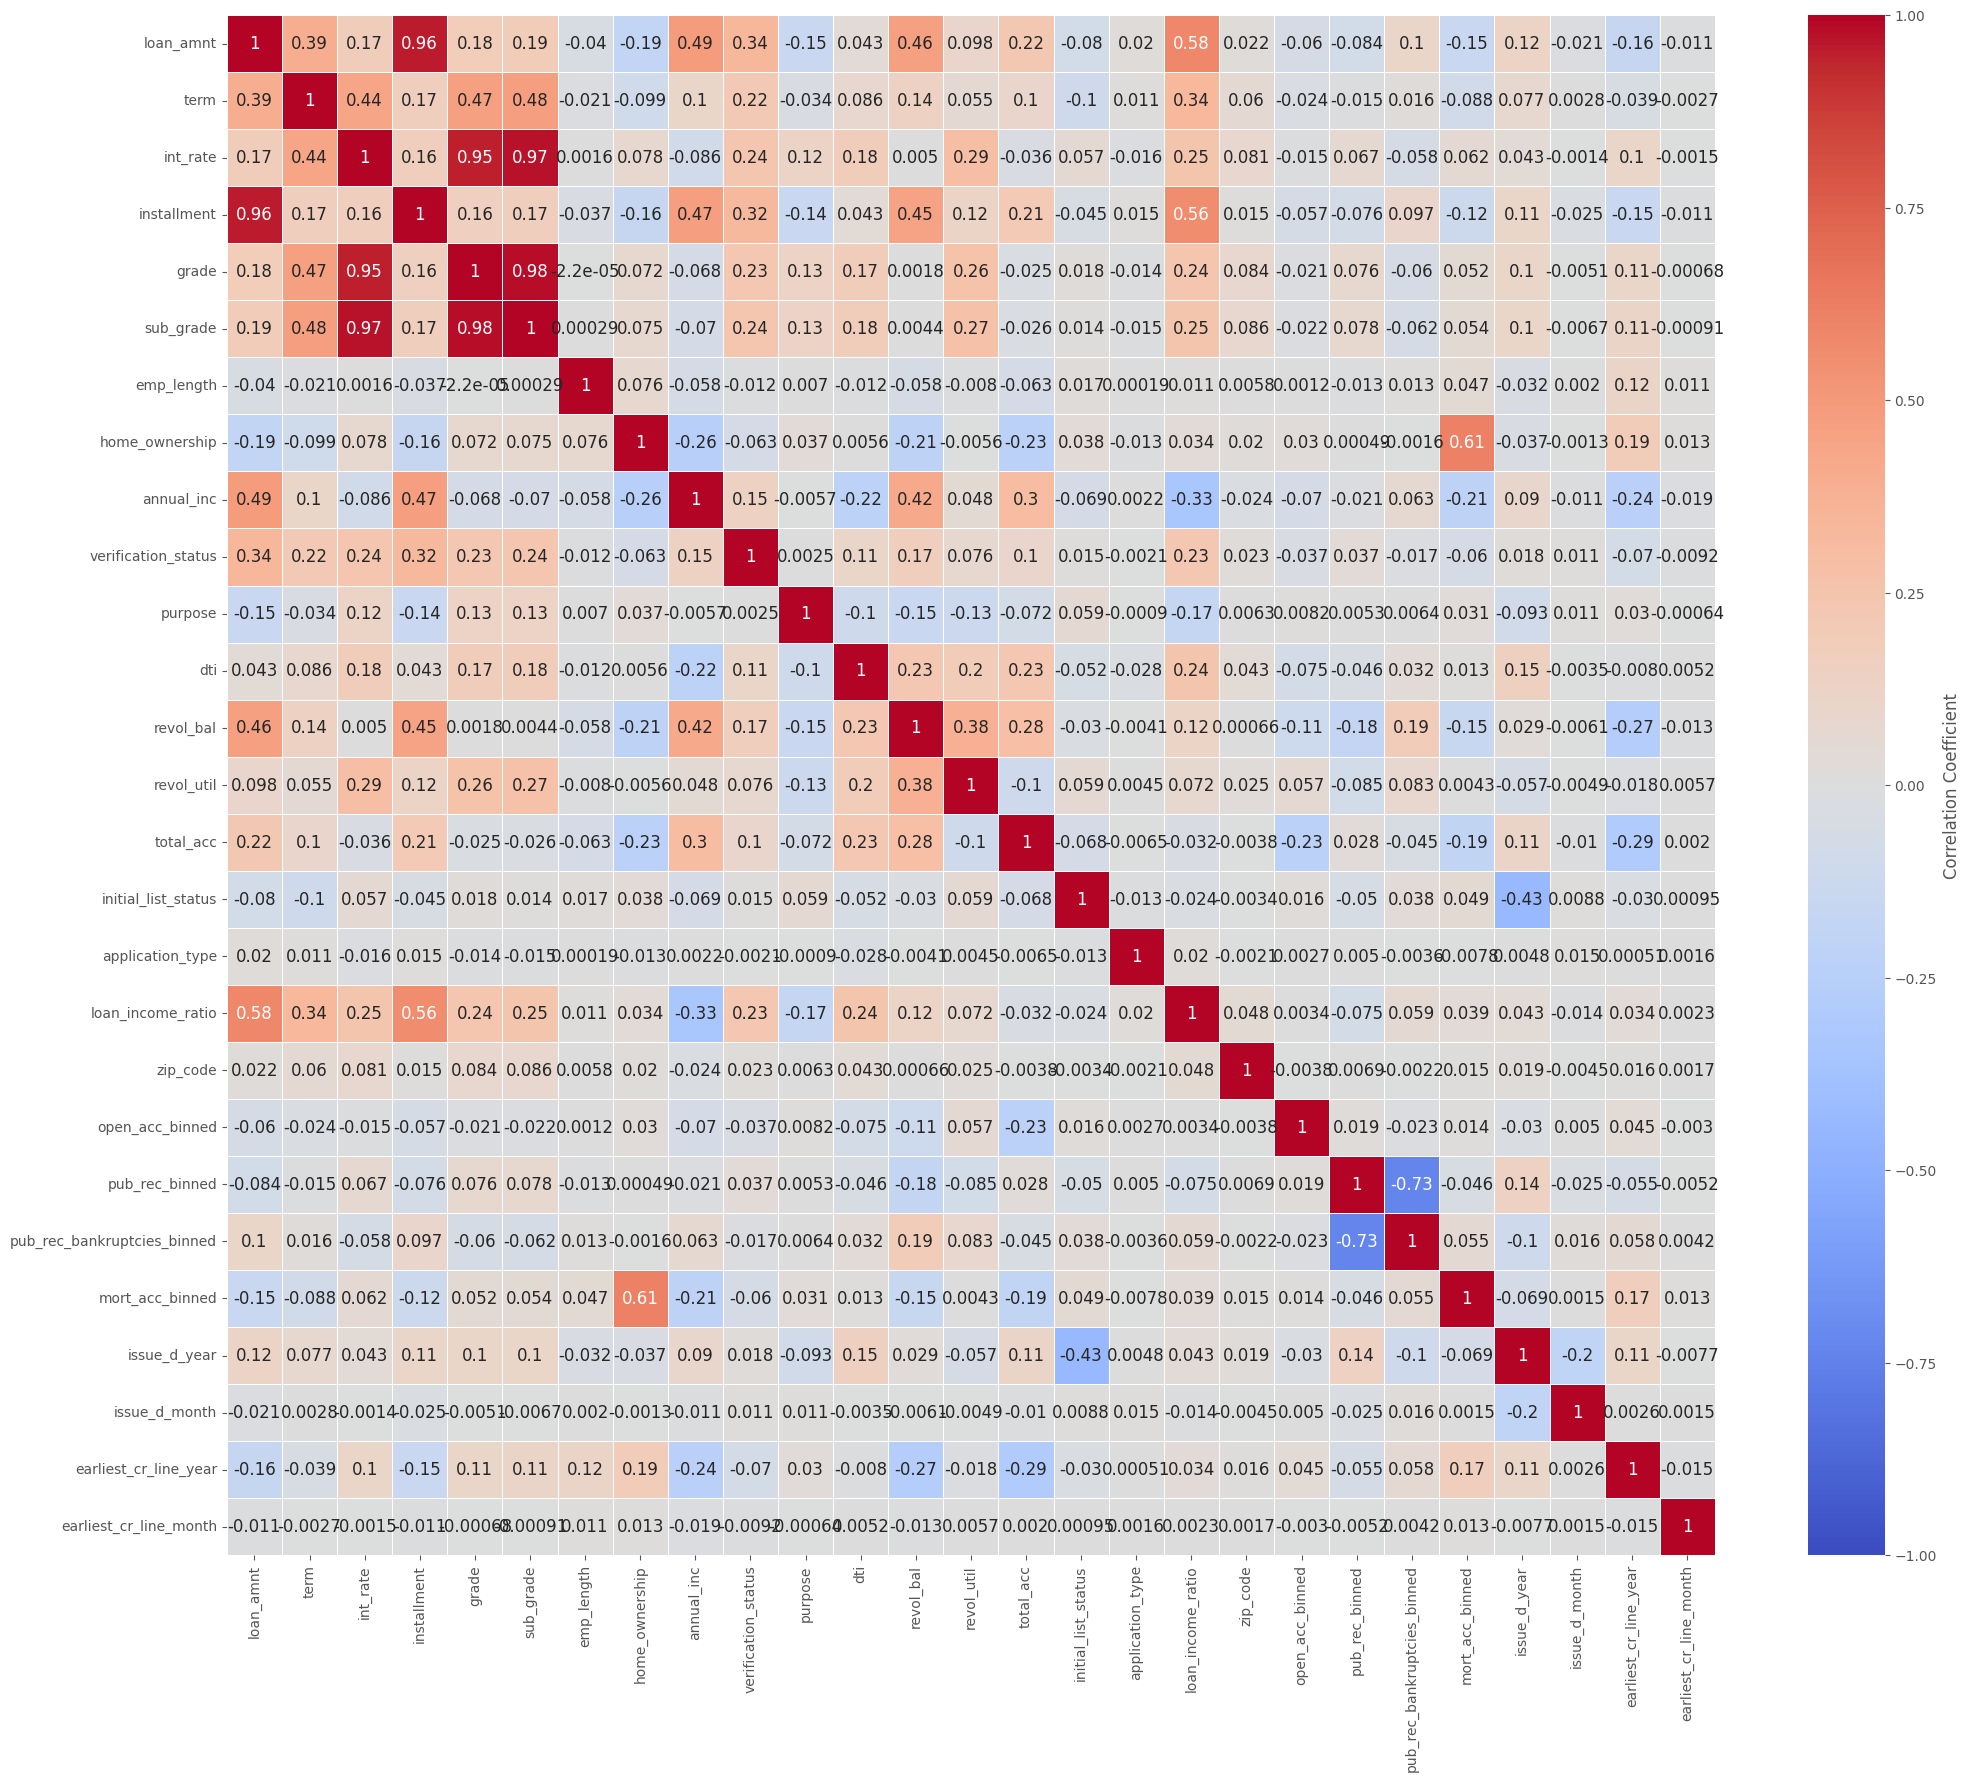

In [378]:
df_corr = xtrain.corr()

plt.figure(figsize=(24, 20))

heatmap = sns.heatmap(
  df_corr,
  annot=True,
  cmap='coolwarm',
  vmin=-1, vmax=1,
  linewidths=0.5,
  annot_kws={"size": 12},
  cbar_kws={'label': 'Correlation Coefficient'}
)

plt.show()

In [379]:
df.drop(columns=['loan_amnt', 'annual_inc', 'int_rate'], inplace=True, errors='ignore')

# Logistic Regression

In [380]:
# store all Models performances
result = {}

In [381]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_lr = {
    'C': [0.01, 0.1, 1, 10.0],
    'max_iter': [100, 200, 500]
}

lr_model = GridSearchCV(
    estimator=LogisticRegression(solver='lbfgs', penalty='l2', class_weight='balanced', random_state=42),
    param_grid=param_lr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

lr_model.fit(xtrain_scaled, ytrain)
lr_model.best_params_, lr_model.best_score_

({'C': 10.0, 'max_iter': 100}, 0.7893764210575022)

In [382]:
# performance
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score

ypred = lr_model.predict(xtest_scaled)
ypred_prob = lr_model.predict_proba(xtest_scaled)[:, 1]

fpr, tpr, _ = roc_curve(ytest, ypred_prob)
roc_auc = auc(fpr, tpr)

precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

result['Logistic Regression'] = {
  'Precision': precision,
  'Recall': recall,
  'F1 Score': f1,
  'Train ROC-AUC': lr_model.best_score_,
  'Test ROC-AUC': roc_auc
}

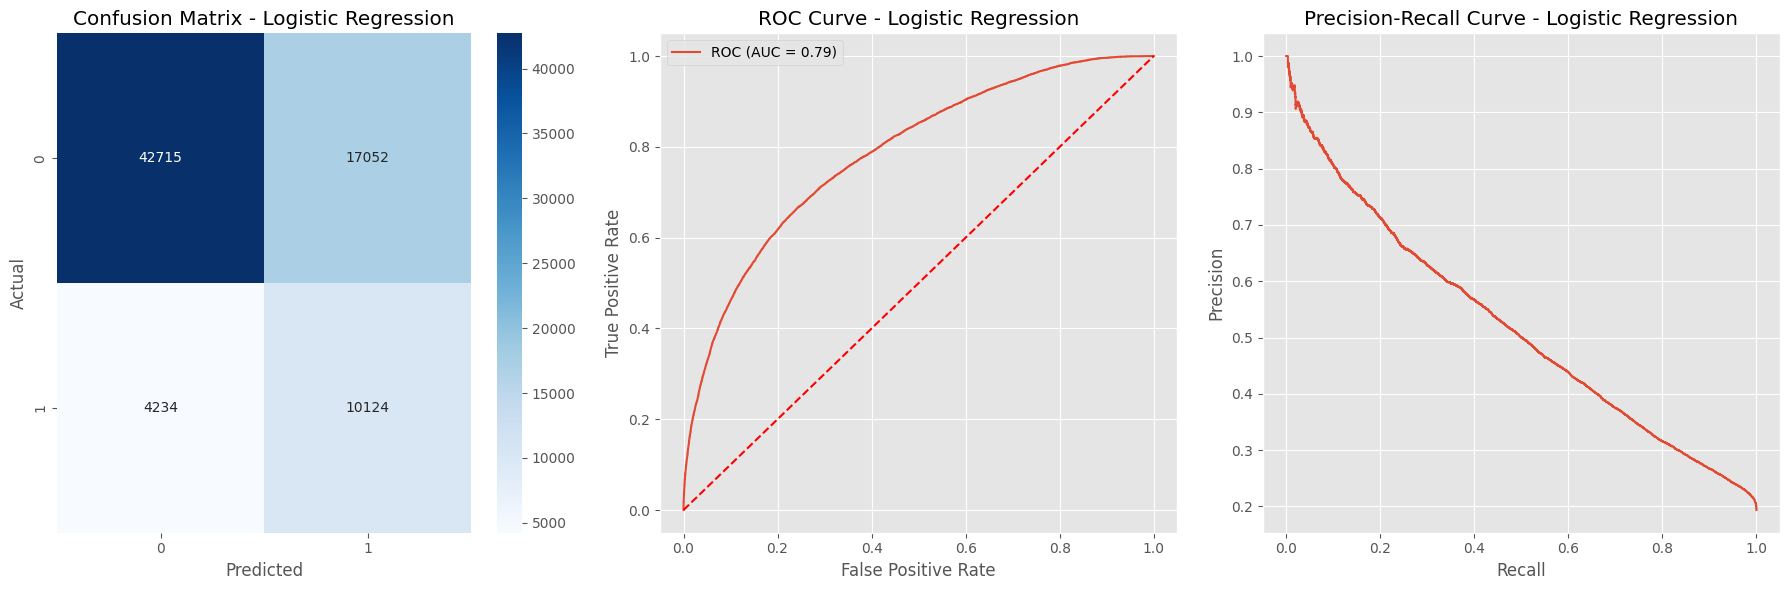

In [383]:
# visualization
from sklearn.metrics import confusion_matrix, precision_recall_curve

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

conf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

axes[1].plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='r')
axes[1].set_title(f'ROC Curve - Logistic Regression')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

precision_vals, recall_vals, _ = precision_recall_curve(ytest, ypred_prob)
axes[2].plot(recall_vals, precision_vals, label='Precision-Recall Curve')
axes[2].set_title(f'Precision-Recall Curve - Logistic Regression')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')

plt.tight_layout()
plt.show()

# XGBoost

In [384]:
!pip install xgboost -q

In [385]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_xgb = {
    # 'n_estimators': [100, 200, 500],
    # 'learning_rate': [0.01, 0.1, 0.2],
    # 'max_depth': [3, 5, 7],
    # 'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    # 'subsample': [0.7, 0.8, 1.0],
    # 'colsample_bytree': [0.7, 0.8, 1.0]
}

weight_ratio = len(ytrain[ytrain==0]) / len(ytrain[ytrain==1])

xgb_model = GridSearchCV(
    estimator=XGBClassifier(cale_pos_weight=weight_ratio, eval_metric='logloss', random_state=42),
    param_grid=param_xgb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

xgb_model.fit(xtrain_scaled, ytrain)
xgb_model.best_params_, xgb_model.best_score_

({'gamma': 0.3}, 0.9109486516049584)

In [386]:
# performance
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score

ypred = xgb_model.predict(xtest_scaled)
ypred_prob = xgb_model.predict_proba(xtest_scaled)[:, 1]

fpr, tpr, _ = roc_curve(ytest, ypred_prob)
roc_auc = auc(fpr, tpr)

precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

result['XGBoost'] = {
  'Precision': precision,
  'Recall': recall,
  'F1 Score': f1,
  'Train ROC-AUC': xgb_model.best_score_,
  'Test ROC-AUC': roc_auc
}

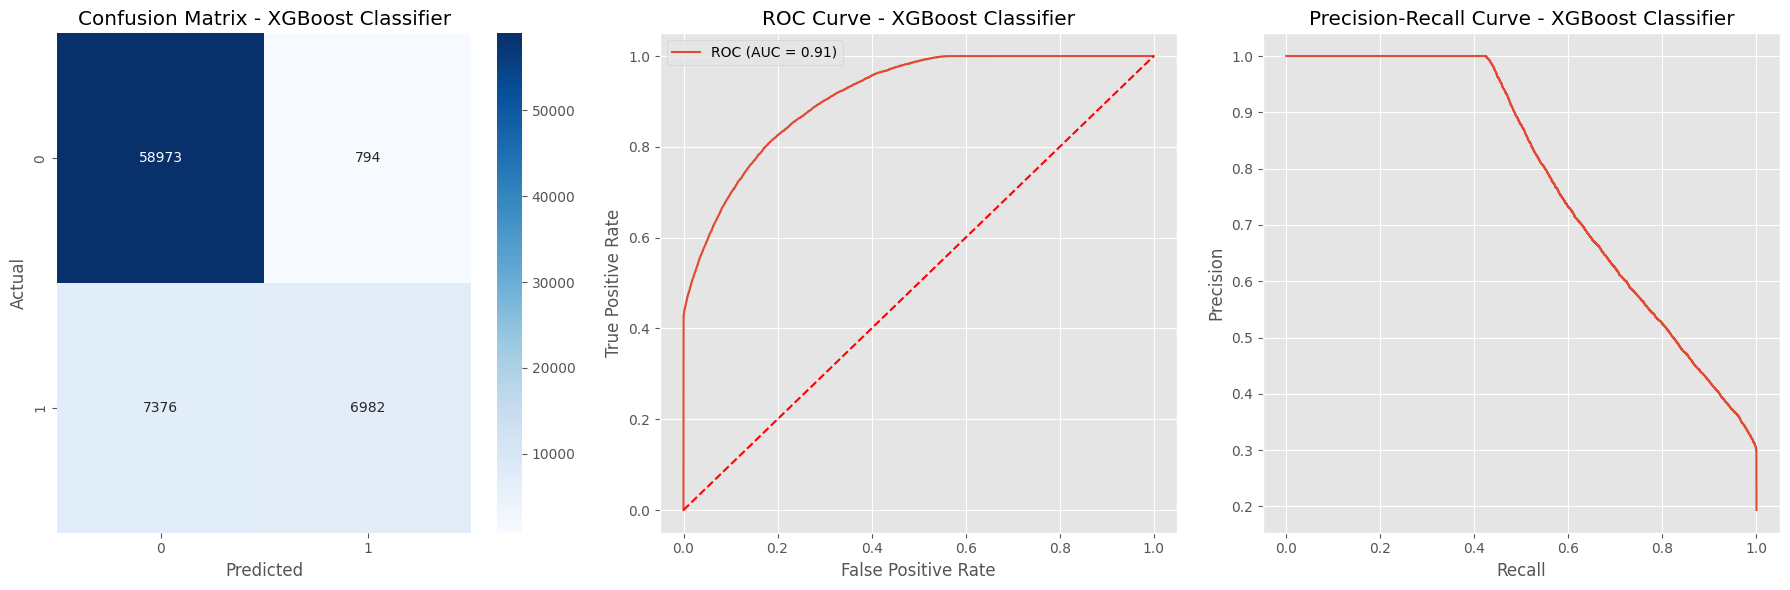

In [387]:
# visualization
from sklearn.metrics import confusion_matrix, precision_recall_curve

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

conf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Confusion Matrix - XGBoost Classifier')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

axes[1].plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='r')
axes[1].set_title(f'ROC Curve - XGBoost Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

precision_vals, recall_vals, _ = precision_recall_curve(ytest, ypred_prob)
axes[2].plot(recall_vals, precision_vals, label='Precision-Recall Curve')
axes[2].set_title(f'Precision-Recall Curve - XGBoost Classifier')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')

plt.tight_layout()
plt.show()

# Model Result

In [388]:
result_df = pd.DataFrame(result).T
result_df

,Precision,Recall,F1 Score,Train ROC-AUC,Test ROC-AUC
Logistic Regression,0.372535,0.705112,0.487504,0.789376,0.785512
XGBoost,0.897891,0.486279,0.630885,0.910949,0.911951
